## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1,2"
import tensorflow as tf

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.5)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
x_train.shape

(50000, 3072)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
num_classes=10
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    model = Sequential()
    model.add(Dense(128,input_dim=3072,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model
model = build_mlp()

In [6]:

model.summary()
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 420,522
Trainable params: 420,522
Non-trainable params: 0
________________________________________________

In [7]:
"""
Compile 模型
"""
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
"""
設定要訓練的 Epoch 數
"""
history= model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 59us/step - loss: 2.1462 - accuracy: 0.1920 - val_loss: 1.9602 - val_accuracy: 0.2955
Epoch 2/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.9797 - accuracy: 0.2719 - val_loss: 1.8312 - val_accuracy: 0.3529
Epoch 3/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.8884 - accuracy: 0.3183 - val_loss: 1.7301 - val_accuracy: 0.3806
Epoch 4/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.8236 - accuracy: 0.3447 - val_loss: 1.6982 - val_accuracy: 0.3844
Epoch 5/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.7889 - accuracy: 0.3564 - val_loss: 1.6835 - val_accuracy: 0.3925
Epoch 6/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.7372 - accuracy: 0.3791 - val_loss: 1.6318 - val_accuracy: 0.4180
Epoch 7/500
50000/50000 [==============================] - 3s 

Epoch 56/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.3208 - accuracy: 0.5332 - val_loss: 1.4185 - val_accuracy: 0.5066
Epoch 57/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.3133 - accuracy: 0.5362 - val_loss: 1.4395 - val_accuracy: 0.5025
Epoch 58/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.3107 - accuracy: 0.5378 - val_loss: 1.4683 - val_accuracy: 0.4909
Epoch 59/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.2942 - accuracy: 0.5441 - val_loss: 1.4467 - val_accuracy: 0.5096
Epoch 60/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2984 - accuracy: 0.5432 - val_loss: 1.4266 - val_accuracy: 0.5053
Epoch 61/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.2854 - accuracy: 0.5468 - val_loss: 1.4402 - val_accuracy: 0.5053
Epoch 62/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2935 - accuracy: 0.5419

50000/50000 [==============================] - 3s 55us/step - loss: 1.1698 - accuracy: 0.5818 - val_loss: 1.5986 - val_accuracy: 0.4888
Epoch 111/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1572 - accuracy: 0.5855 - val_loss: 1.5143 - val_accuracy: 0.4997
Epoch 112/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.1676 - accuracy: 0.5784 - val_loss: 1.5556 - val_accuracy: 0.4968
Epoch 113/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.1628 - accuracy: 0.5825 - val_loss: 1.5523 - val_accuracy: 0.4963
Epoch 114/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.1582 - accuracy: 0.5842 - val_loss: 1.5867 - val_accuracy: 0.4988
Epoch 115/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.1560 - accuracy: 0.5849 - val_loss: 1.5759 - val_accuracy: 0.4930
Epoch 116/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1557 - accuracy: 0.5810 - 

50000/50000 [==============================] - 6s 122us/step - loss: 1.0819 - accuracy: 0.6073 - val_loss: 1.7108 - val_accuracy: 0.4948
Epoch 165/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0912 - accuracy: 0.6002 - val_loss: 1.6842 - val_accuracy: 0.4987
Epoch 166/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.0691 - accuracy: 0.6104 - val_loss: 1.7457 - val_accuracy: 0.4931
Epoch 167/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.0766 - accuracy: 0.6080 - val_loss: 1.7092 - val_accuracy: 0.4897
Epoch 168/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0677 - accuracy: 0.6089 - val_loss: 1.7533 - val_accuracy: 0.4961
Epoch 169/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0725 - accuracy: 0.6086 - val_loss: 1.7137 - val_accuracy: 0.4915
Epoch 170/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0729 - accuracy: 0.6067

50000/50000 [==============================] - 6s 126us/step - loss: 1.0184 - accuracy: 0.6241 - val_loss: 1.9131 - val_accuracy: 0.4871
Epoch 219/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.0173 - accuracy: 0.6263 - val_loss: 1.8767 - val_accuracy: 0.4875
Epoch 220/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0174 - accuracy: 0.6258 - val_loss: 1.8906 - val_accuracy: 0.4870
Epoch 221/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.0188 - accuracy: 0.6234 - val_loss: 1.9261 - val_accuracy: 0.4907
Epoch 222/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.0094 - accuracy: 0.6266 - val_loss: 1.8856 - val_accuracy: 0.4858
Epoch 223/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.0240 - accuracy: 0.6210 - val_loss: 1.8657 - val_accuracy: 0.4908
Epoch 224/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0122 - accuracy: 0.6262

50000/50000 [==============================] - 6s 126us/step - loss: 0.9668 - accuracy: 0.6387 - val_loss: 2.0837 - val_accuracy: 0.4803
Epoch 273/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9844 - accuracy: 0.6319 - val_loss: 2.0078 - val_accuracy: 0.4906
Epoch 274/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.9893 - accuracy: 0.6330 - val_loss: 2.0117 - val_accuracy: 0.4853
Epoch 275/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.9763 - accuracy: 0.6367 - val_loss: 2.0335 - val_accuracy: 0.4929
Epoch 276/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.9713 - accuracy: 0.6376 - val_loss: 2.0202 - val_accuracy: 0.4866
Epoch 277/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9742 - accuracy: 0.6374 - val_loss: 2.0561 - val_accuracy: 0.4883
Epoch 278/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.9809 - accuracy: 0.6372

50000/50000 [==============================] - 6s 125us/step - loss: 0.9483 - accuracy: 0.6434 - val_loss: 2.2252 - val_accuracy: 0.4799
Epoch 327/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.9472 - accuracy: 0.6441 - val_loss: 2.1978 - val_accuracy: 0.4764
Epoch 328/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9393 - accuracy: 0.6467 - val_loss: 2.2780 - val_accuracy: 0.4809
Epoch 329/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9320 - accuracy: 0.6485 - val_loss: 2.2350 - val_accuracy: 0.4881
Epoch 330/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.9385 - accuracy: 0.6495 - val_loss: 2.2067 - val_accuracy: 0.4851
Epoch 331/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9469 - accuracy: 0.6456 - val_loss: 2.2117 - val_accuracy: 0.4823
Epoch 332/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9359 - accuracy: 0.6496

50000/50000 [==============================] - 6s 125us/step - loss: 0.9104 - accuracy: 0.6548 - val_loss: 2.4785 - val_accuracy: 0.4815
Epoch 381/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9099 - accuracy: 0.6553 - val_loss: 2.3666 - val_accuracy: 0.4843
Epoch 382/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.9124 - accuracy: 0.6552 - val_loss: 2.4444 - val_accuracy: 0.4861
Epoch 383/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9157 - accuracy: 0.6549 - val_loss: 2.3800 - val_accuracy: 0.4829
Epoch 384/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.9105 - accuracy: 0.6572 - val_loss: 2.2999 - val_accuracy: 0.4792
Epoch 385/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9302 - accuracy: 0.6509 - val_loss: 2.3280 - val_accuracy: 0.4844
Epoch 386/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.9159 - accuracy: 0.6565

50000/50000 [==============================] - 6s 126us/step - loss: 0.8890 - accuracy: 0.6616 - val_loss: 2.5044 - val_accuracy: 0.4759
Epoch 435/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.8918 - accuracy: 0.6619 - val_loss: 2.6228 - val_accuracy: 0.4764
Epoch 436/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.8981 - accuracy: 0.6599 - val_loss: 2.4828 - val_accuracy: 0.4792
Epoch 437/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.8978 - accuracy: 0.6591 - val_loss: 2.5128 - val_accuracy: 0.4785
Epoch 438/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.8772 - accuracy: 0.6658 - val_loss: 2.5604 - val_accuracy: 0.4775
Epoch 439/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.8991 - accuracy: 0.6589 - val_loss: 2.5468 - val_accuracy: 0.4772
Epoch 440/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.8827 - accuracy: 0.6645 - v

50000/50000 [==============================] - 3s 54us/step - loss: 0.8850 - accuracy: 0.6652 - val_loss: 2.6141 - val_accuracy: 0.4756
Epoch 489/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.8781 - accuracy: 0.6674 - val_loss: 2.5365 - val_accuracy: 0.4816
Epoch 490/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.8712 - accuracy: 0.6675 - val_loss: 2.6853 - val_accuracy: 0.4756
Epoch 491/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.8611 - accuracy: 0.6716 - val_loss: 2.7044 - val_accuracy: 0.47530.8
Epoch 492/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.8524 - accuracy: 0.6738 - val_loss: 2.6200 - val_accuracy: 0.4740
Epoch 493/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.8727 - accuracy: 0.6687 - val_loss: 2.6592 - val_accuracy: 0.4720
Epoch 494/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.8527 - accuracy: 0.6741 - v

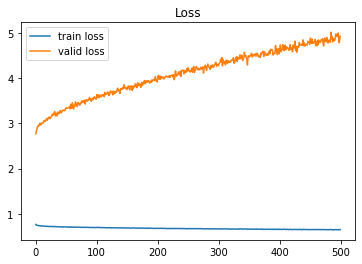

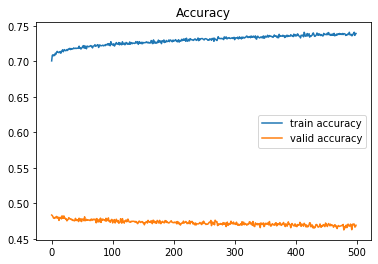

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
model.compile(loss ='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history= model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.7659 - accuracy: 0.7007 - val_loss: 2.7691 - val_accuracy: 0.4834
Epoch 2/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.7499 - accuracy: 0.7084 - val_loss: 2.8276 - val_accuracy: 0.4826
Epoch 3/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.7449 - accuracy: 0.7093 - val_loss: 2.8862 - val_accuracy: 0.4812
Epoch 4/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.7425 - accuracy: 0.7079 - val_loss: 2.9299 - val_accuracy: 0.4791
Epoch 5/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.7407 - accuracy: 0.7090 - val_loss: 2.9514 - val_accuracy: 0.4799
Epoch 6/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.7403 - accuracy: 0.7082 - val_loss: 2.9421 - val_accuracy: 0.4787
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.7081 - accuracy: 0.7187 - val_loss: 3.3671 - val_accuracy: 0.4755
Epoch 57/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.7038 - accuracy: 0.7217 - val_loss: 3.3250 - val_accuracy: 0.4756
Epoch 58/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.7110 - accuracy: 0.7178 - val_loss: 3.4124 - val_accuracy: 0.4774
Epoch 59/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.7058 - accuracy: 0.7209 - val_loss: 3.4218 - val_accuracy: 0.4760
Epoch 60/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.7065 - accuracy: 0.7216 - val_loss: 3.3351 - val_accuracy: 0.4768
Epoch 61/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.7077 - accuracy: 0.7207 - val_loss: 3.4571 - val_accuracy: 0.4761
Epoch 62/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.7058 - accuracy: 0.7206

Epoch 111/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6932 - accuracy: 0.7266 - val_loss: 3.6372 - val_accuracy: 0.4718
Epoch 112/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6942 - accuracy: 0.7234 - val_loss: 3.6326 - val_accuracy: 0.4726
Epoch 113/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6971 - accuracy: 0.7261 - val_loss: 3.5923 - val_accuracy: 0.4731
Epoch 114/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6940 - accuracy: 0.7250 - val_loss: 3.6914 - val_accuracy: 0.4782
Epoch 115/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6944 - accuracy: 0.7236 - val_loss: 3.6371 - val_accuracy: 0.4755
Epoch 116/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6916 - accuracy: 0.7236 - val_loss: 3.6483 - val_accuracy: 0.4719
Epoch 117/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6883 - accuracy:

50000/50000 [==============================] - 2s 46us/step - loss: 0.6819 - accuracy: 0.7291 - val_loss: 3.8697 - val_accuracy: 0.4741
Epoch 166/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.6835 - accuracy: 0.7253 - val_loss: 3.7998 - val_accuracy: 0.4712
Epoch 167/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.6869 - accuracy: 0.7251 - val_loss: 3.7923 - val_accuracy: 0.4758
Epoch 168/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.6791 - accuracy: 0.7303 - val_loss: 3.9012 - val_accuracy: 0.4760
Epoch 169/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.6824 - accuracy: 0.7261 - val_loss: 3.8765 - val_accuracy: 0.4727
Epoch 170/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6832 - accuracy: 0.7280 - val_loss: 3.8389 - val_accuracy: 0.4745
Epoch 171/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6860 - accuracy: 0.7258 - val_

Epoch 220/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6743 - accuracy: 0.7321 - val_loss: 4.0555 - val_accuracy: 0.4735
Epoch 221/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6783 - accuracy: 0.7283 - val_loss: 4.0172 - val_accuracy: 0.4743
Epoch 222/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6727 - accuracy: 0.7327 - val_loss: 4.0599 - val_accuracy: 0.4734
Epoch 223/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6736 - accuracy: 0.7301 - val_loss: 4.0589 - val_accuracy: 0.4712
Epoch 224/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6755 - accuracy: 0.7283 - val_loss: 4.0696 - val_accuracy: 0.4719
Epoch 225/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6720 - accuracy: 0.7295 - val_loss: 4.0733 - val_accuracy: 0.4715
Epoch 226/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6716 - accuracy:

50000/50000 [==============================] - 2s 45us/step - loss: 0.6671 - accuracy: 0.7348 - val_loss: 4.1986 - val_accuracy: 0.4709
Epoch 275/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6683 - accuracy: 0.7326 - val_loss: 4.2525 - val_accuracy: 0.4696
Epoch 276/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6681 - accuracy: 0.7325 - val_loss: 4.1159 - val_accuracy: 0.4707
Epoch 277/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6668 - accuracy: 0.7320 - val_loss: 4.2433 - val_accuracy: 0.4705
Epoch 278/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6647 - accuracy: 0.7323 - val_loss: 4.2403 - val_accuracy: 0.4715
Epoch 279/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6701 - accuracy: 0.7321 - val_loss: 4.2917 - val_accuracy: 0.4705
Epoch 280/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6699 - accuracy: 0.7325 - val_

Epoch 329/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6628 - accuracy: 0.7340 - val_loss: 4.4535 - val_accuracy: 0.4706
Epoch 330/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6635 - accuracy: 0.7351 - val_loss: 4.4770 - val_accuracy: 0.4688
Epoch 331/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6633 - accuracy: 0.7344 - val_loss: 4.3736 - val_accuracy: 0.4743
Epoch 332/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6619 - accuracy: 0.7357 - val_loss: 4.4691 - val_accuracy: 0.4694
Epoch 333/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6606 - accuracy: 0.7344 - val_loss: 4.4163 - val_accuracy: 0.4673
Epoch 334/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6661 - accuracy: 0.7336 - val_loss: 4.4283 - val_accuracy: 0.4672
Epoch 335/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6611 - accuracy:

50000/50000 [==============================] - 2s 45us/step - loss: 0.6589 - accuracy: 0.7337 - val_loss: 4.5356 - val_accuracy: 0.4684
Epoch 384/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6579 - accuracy: 0.7356 - val_loss: 4.6097 - val_accuracy: 0.4672
Epoch 385/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6585 - accuracy: 0.7346 - val_loss: 4.5446 - val_accuracy: 0.4712
Epoch 386/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6582 - accuracy: 0.7364 - val_loss: 4.6418 - val_accuracy: 0.4695
Epoch 387/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6556 - accuracy: 0.7369 - val_loss: 4.6262 - val_accuracy: 0.4676
Epoch 388/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6605 - accuracy: 0.7350 - val_loss: 4.6377 - val_accuracy: 0.4700
Epoch 389/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6541 - accuracy: 0.7364 - val_

Epoch 438/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6477 - accuracy: 0.7387 - val_loss: 4.7277 - val_accuracy: 0.4663
Epoch 439/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6560 - accuracy: 0.7369 - val_loss: 4.8515 - val_accuracy: 0.4666
Epoch 440/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6538 - accuracy: 0.7387 - val_loss: 4.7224 - val_accuracy: 0.4680
Epoch 441/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6536 - accuracy: 0.7379 - val_loss: 4.7866 - val_accuracy: 0.4708
Epoch 442/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.6533 - accuracy: 0.7364 - val_loss: 4.7128 - val_accuracy: 0.4666
Epoch 443/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6520 - accuracy: 0.7378 - val_loss: 4.7284 - val_accuracy: 0.4661
Epoch 444/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.6511 - accuracy:

50000/50000 [==============================] - 2s 46us/step - loss: 0.6469 - accuracy: 0.7381 - val_loss: 4.9013 - val_accuracy: 0.4686
Epoch 493/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6516 - accuracy: 0.7362 - val_loss: 4.9839 - val_accuracy: 0.4627
Epoch 494/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6506 - accuracy: 0.7364 - val_loss: 4.9387 - val_accuracy: 0.4699
Epoch 495/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.6470 - accuracy: 0.7385 - val_loss: 4.9248 - val_accuracy: 0.4707
Epoch 496/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6455 - accuracy: 0.7395 - val_loss: 4.9528 - val_accuracy: 0.4696
Epoch 497/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6449 - accuracy: 0.7411 - val_loss: 5.0024 - val_accuracy: 0.4707
Epoch 498/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.6497 - accuracy: 0.7367 - val_

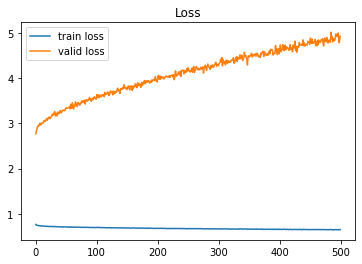

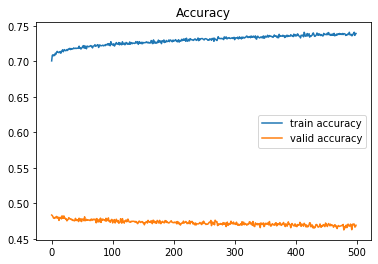

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()